<a href="https://colab.research.google.com/github/mkeohane01/GAN-Image-Denoising/blob/kgreed/notebooks/SRGAN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if not os.path.exists('srgan.pth.tar'):
    !pip install -q torch_snippets
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')
    from torch_snippets import *
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 101.3 MB/s e

In [19]:
print(device)
generator = torch.load('srgan.pth.tar', map_location=device)['generator']
discriminator = torch.load('srgan.pth.tar', map_location=device)['discriminator']
# model.eval()

cuda

/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source code by accessing the object's source attribute 

In [6]:
!pip install kaggle
from google.colab import files
files.upload()

# Download kaggle dataset
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Small dataset
!kaggle datasets download -d rajat95gupta/smartphone-image-denoising-dataset

# Medium dataset
#!kaggle datasets download -d soumikrakshit/smartphone-image-denoising-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 6.16G/6.16G [05:28<00:00, 16.5MB/s]
100% 6.16G/6.16G [05:28<00:00, 20.1MB/s]


In [7]:
# Unzip the smartphone denoising dataset
!unzip '/content/smartphone-image-denoising-dataset.zip'

Archive:  /content/smartphone-image-denoising-dataset.zip
  inflating: SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/GT_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/NOISY_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0002_001_S6_00100_00020_3200_N/GT_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0002_001_S6_00100_00020_3200_N/NOISY_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0003_001_S6_00100_00060_3200_H/GT_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0003_001_S6_00100_00060_3200_H/NOISY_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0004_001_S6_00100_00060_4400_L/GT_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0004_001_S6_00100_00060_4400_L/NOISY_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0005_001_S6_00100_00060_4400_N/GT_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0005_001_S6_00100_00060_4400_N/NOISY_SRGB_010.PNG  
  inflating: SIDD_Small_sRGB_Only/Data/0006_001

In [6]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

In [8]:
image = readPIL('/content/SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/GT_SRGB_010.PNG')
image.size
# (260,181)
image = image.resize((130,90))
im = preprocess(image)

In [9]:
sr = model(im[None])[0]
sr = postprocess(sr)

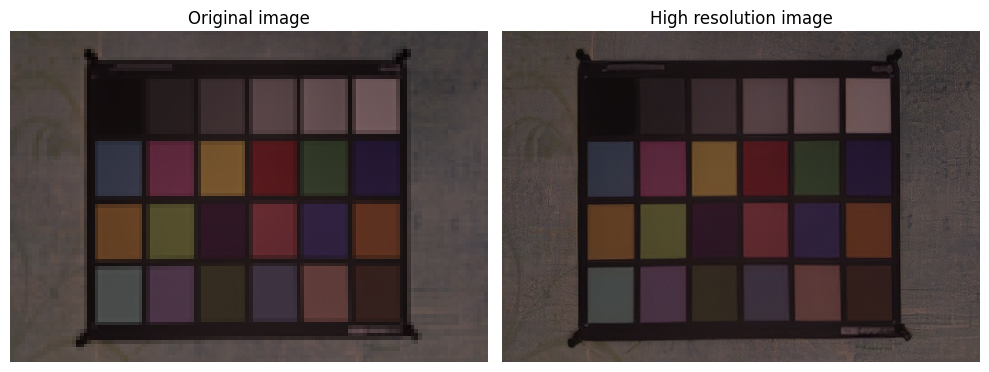

In [10]:
subplots([image, sr], nc=2, figsize=(10,10), titles=['Original image','High resolution image'])

In [16]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from torch_snippets import *
from models import Generator, Discriminator
from PIL import Image
from sklearn.model_selection import train_test_split
from torchvision import transforms as T


In [27]:
process_transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Resize((1024, 1024)),
])

class ImagePairDataset(Dataset):
    def __init__(self, noisy_image_paths, sharp_image_paths, transform=None):
        """
        Args:
            noisy_image_paths (list of str): Paths to the noisy images.
            sharp_image_paths (list of str): Paths to the sharp, high-definition images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        assert len(noisy_image_paths) == len(sharp_image_paths), "The number of noisy and sharp images must be the same."
        self.noisy_image_paths = noisy_image_paths
        self.sharp_image_paths = sharp_image_paths
        self.transform = transform

    def __len__(self):
        return len(self.noisy_image_paths)

    def __getitem__(self, idx):
        noisy_image = Image.open(self.noisy_image_paths[idx]).convert('RGB')
        sharp_image = Image.open(self.sharp_image_paths[idx]).convert('RGB')

        if self.transform:
            noisy_image = self.transform(noisy_image)
            sharp_image = self.transform(sharp_image)

        return noisy_image, sharp_image


In [33]:

# Function to load image pairs from a folder
def load_image_pairs(folder):
    gt_images = []
    noisy_images = []
    for root, _, files in os.walk(folder):
        for file in files:
            if 'GT' in file:
                gt_images.append(os.path.join(root, file))
            elif 'NOISY' in file:
                noisy_images.append(os.path.join(root, file))
    return gt_images, noisy_images

# Function to load and preprocess images
# def load_images(gt_images, noisy_images):
#     images = []
#     for gt_img, noisy_img in zip(gt_images, noisy_images):
#         gt_image = preprocess(readPIL(gt_img))
#         noisy_image = preprocess(readPIL(noisy_img))
#         images.append((gt_image, noisy_image))
#     return images

# Define the training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for gt_image, noisy_image in train_loader:
            gt_image = gt_image.to(device)
            noisy_image = noisy_image.to(device)
            optimizer.zero_grad()
            sr_image = model(noisy_image)
            loss = criterion(sr_image, gt_image)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * noisy_image.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
        gc.collect()

# Function to compute PSNR
def compute_psnr(sr_image, gt_image):
    mse = nn.MSELoss()(sr_image, gt_image)
    psnr = 20 * torch.log10(1.0 / torch.sqrt(mse))
    return psnr.item()

# Function to compute SSIM
def compute_ssim(sr_image, gt_image):
    ssim_val = ssim(sr_image, gt_image, data_range=1.0, win_size=11, win_sigma=1.5, k1=0.01, k2=0.03)
    return ssim_val.item()

# Function to compute FID
def compute_fid(sr_images, gt_images):
    fid_score = calculate_fid(sr_images, gt_images)
    return fid_score

In [30]:
# Main function to load data, train model, and compute metrics
def main(train_folder, num_epochs=5):
    # Load image pairs
    gt_images, noisy_images = load_image_pairs(train_folder)
    print(f'Number of training images: {len(gt_images)}')
    print(f'Number of validation images: {len(noisy_images)}')

    # split to train and val
    noisy_train_images, noisy_val_images = train_test_split(noisy_images, test_size=0.2, random_state=42)
    gt_train_images, gt_val_images = train_test_split(gt_images, test_size=0.2, random_state=42)

    # Create dataset
    train_set = ImagePairDataset(noisy_train_images, gt_train_images, transform=process_transform)
    val_set = ImagePairDataset(noisy_val_images, gt_val_images, transform=process_transform)

    # Create data loaders
    train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(generator.parameters(), lr=0.001)

    # Train the model
    train_model(generator, train_loader, criterion, optimizer, num_epochs=num_epochs)

    # Compute metrics on validation set
    sr_images = []
    gt_images = []
    for gt_image, noisy_image in val_loader:
        gt_image = gt_image.to(device)
        noisy_image = noisy_image.to(device)
        sr_image = generator(noisy_image)
        sr_images.append(sr_image)
        gt_images.append(gt_image)

    # Compute and print metrics
    psnr = compute_psnr(torch.cat(sr_images), torch.cat(gt_images))
    ssim = compute_ssim(torch.cat(sr_images), torch.cat(gt_images))
    fid = compute_fid(torch.cat(sr_images), torch.cat(gt_images))
    print(f'PSNR: {psnr:.2f}, SSIM: {ssim:.4f}, FID: {fid:.4f}')

In [34]:
# Define variables
train_folder = '/content/SIDD_Small_sRGB_Only/Data'  # Path to the folder containing image pairs
num_epochs = 2

# Call the main function
main(train_folder, num_epochs)

Number of training images: 160

Number of validation images: 160

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 GiB. GPU 0 has a total capacity of 14.75 GiB of which 27.06 MiB is free. Process 2061 has 14.72 GiB memory in use. Of the allocated memory 14.56 GiB is allocated by PyTorch, and 30.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [36]:
import gc
gc.collect()
torch.cuda.empty_cache()